# Distribution Analysis of the OpenBioLink Results
This notebook analysis the distribution of the scores results of the OpenBioLink network (original and permuted) with the two variations of the algorithm (with an without cycles).

In [1]:
import os
import json
import getpass
import sys
import time
from collections import defaultdict

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np

In [2]:
%matplotlib inline

In [3]:
mpl.rcParams['figure.dpi'] = 200

In [4]:
getpass.getuser()

'danieldomingo'

In [5]:
sys.version

'3.8.2 (v3.8.2:7b3ab5921f, Feb 24 2020, 17:52:18) \n[Clang 6.0 (clang-600.0.57)]'

In [6]:
time.asctime()

'Fri May 22 07:09:39 2020'

Load results for different lmax

In [7]:
def normalize_score(score):
    """Normalize score from [-1 to 1]."""
    return (1 - (-1)) * (score - 0) / (1 - 0) -1

def parse_results(path_dir, prefix):
    """Parse directory with results."""
    results = {}
    
    for file in os.listdir(path_dir):
                
        if not file.endswith(".json") or not file.startswith(f"{prefix}all_against_all_lmax_"):
            continue

        lmax = int(file.replace(f"{prefix}all_against_all_lmax_", "").replace(".json", ""))

        with open(os.path.join(path_dir, file), 'r') as f:
            results[lmax] = json.load(f)

            # sort keys by lmax in case they have not been read in order
    results = {
        k: results[k]
        for k in sorted(results.keys())
    }
    
    if not results:
        raise ValueError("Couldnt load any results. Please ensure the valid path is given.")
        
    return results

Function to plot the distributions

In [8]:
def get_scores_for_lmax(results_dict):
    """Change scale from [0, 1] (relative) to [-1, 1] where -1 is full inhibition and 1 full activation."""
    # (maxAllowed - minAllowed) * (unscaledNum - min) / (max - min) + minAllowed  
    return {
         (pair['source'], pair['target']): normalize_score(pair['relative_activation'])
        for pair in results_dict
    }

def plot_distributions(results):
    """Plot distribution."""
    fig, axs = plt.subplots(
        nrows=len(results), 
        ncols=1, 
        figsize=(18, 50), # Play with this
    )
    axs = np.array(axs)
    
    for ax, lmax in zip(axs.reshape(-1), results.keys()):
        
        # Get distributions
        distribution = list(get_scores_for_lmax(results[lmax]).values())
                
        sns.distplot(distribution, ax=ax, hist=True, color='blue', kde_kws={'clip':(-1, 1)})
        
        ax.set_xlim(-1.1, 1.1)
        ax.set_title(f"Distribution of scores for Lmax={lmax} [-1: inhibition, +1: activation)")
        
    fig.tight_layout()
    plt.show()

Plot results for the simple paths version of the algorithm on the original OpenBioLink

In [9]:
results_simple_paths_original_openbiolink = parse_results(
    "/Users/danieldomingo/Downloads/drug2ways/simple_paths/openbiolink/", "openbiolink",
)

results_cycles_original_openbiolink = parse_results(
    "/Users/danieldomingo/Downloads/drug2ways/cycles/openbiolink/", "openbiolink",
)

results_simple_paths_permuted_openbiolink = parse_results(
    "/Users/danieldomingo/Downloads/drug2ways/simple_paths/openbiolink_random/", "shuffled_openbiolink",
)

results_cycles_paths_permuted_openbiolink = parse_results(
    "/Users/danieldomingo/Downloads/drug2ways/cycles/openbiolink_random/", "openbiolink"
)

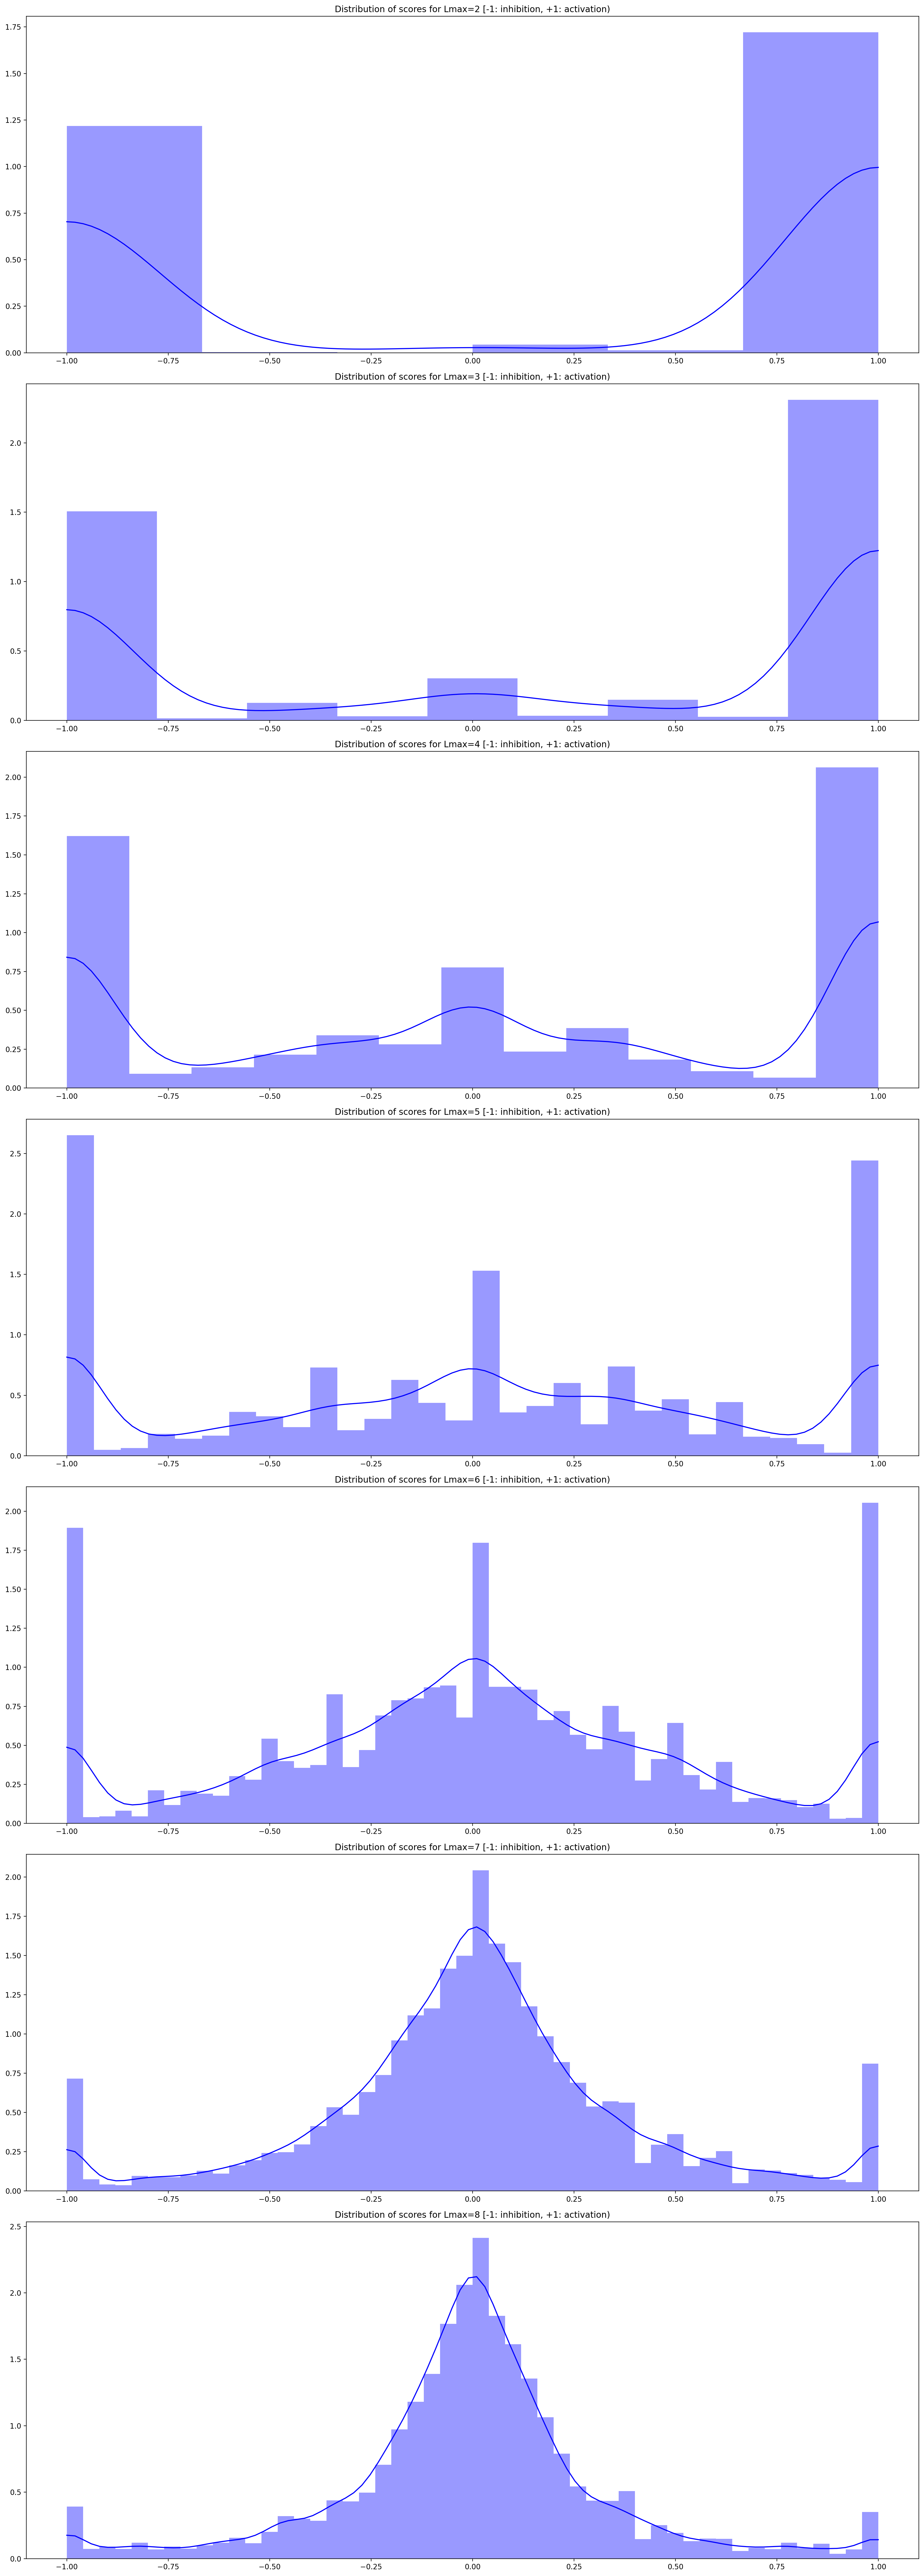

In [10]:
plot_distributions(results_simple_paths_original_openbiolink)

Plot results for the cycles version of the algorithm on the original OpenBioLink

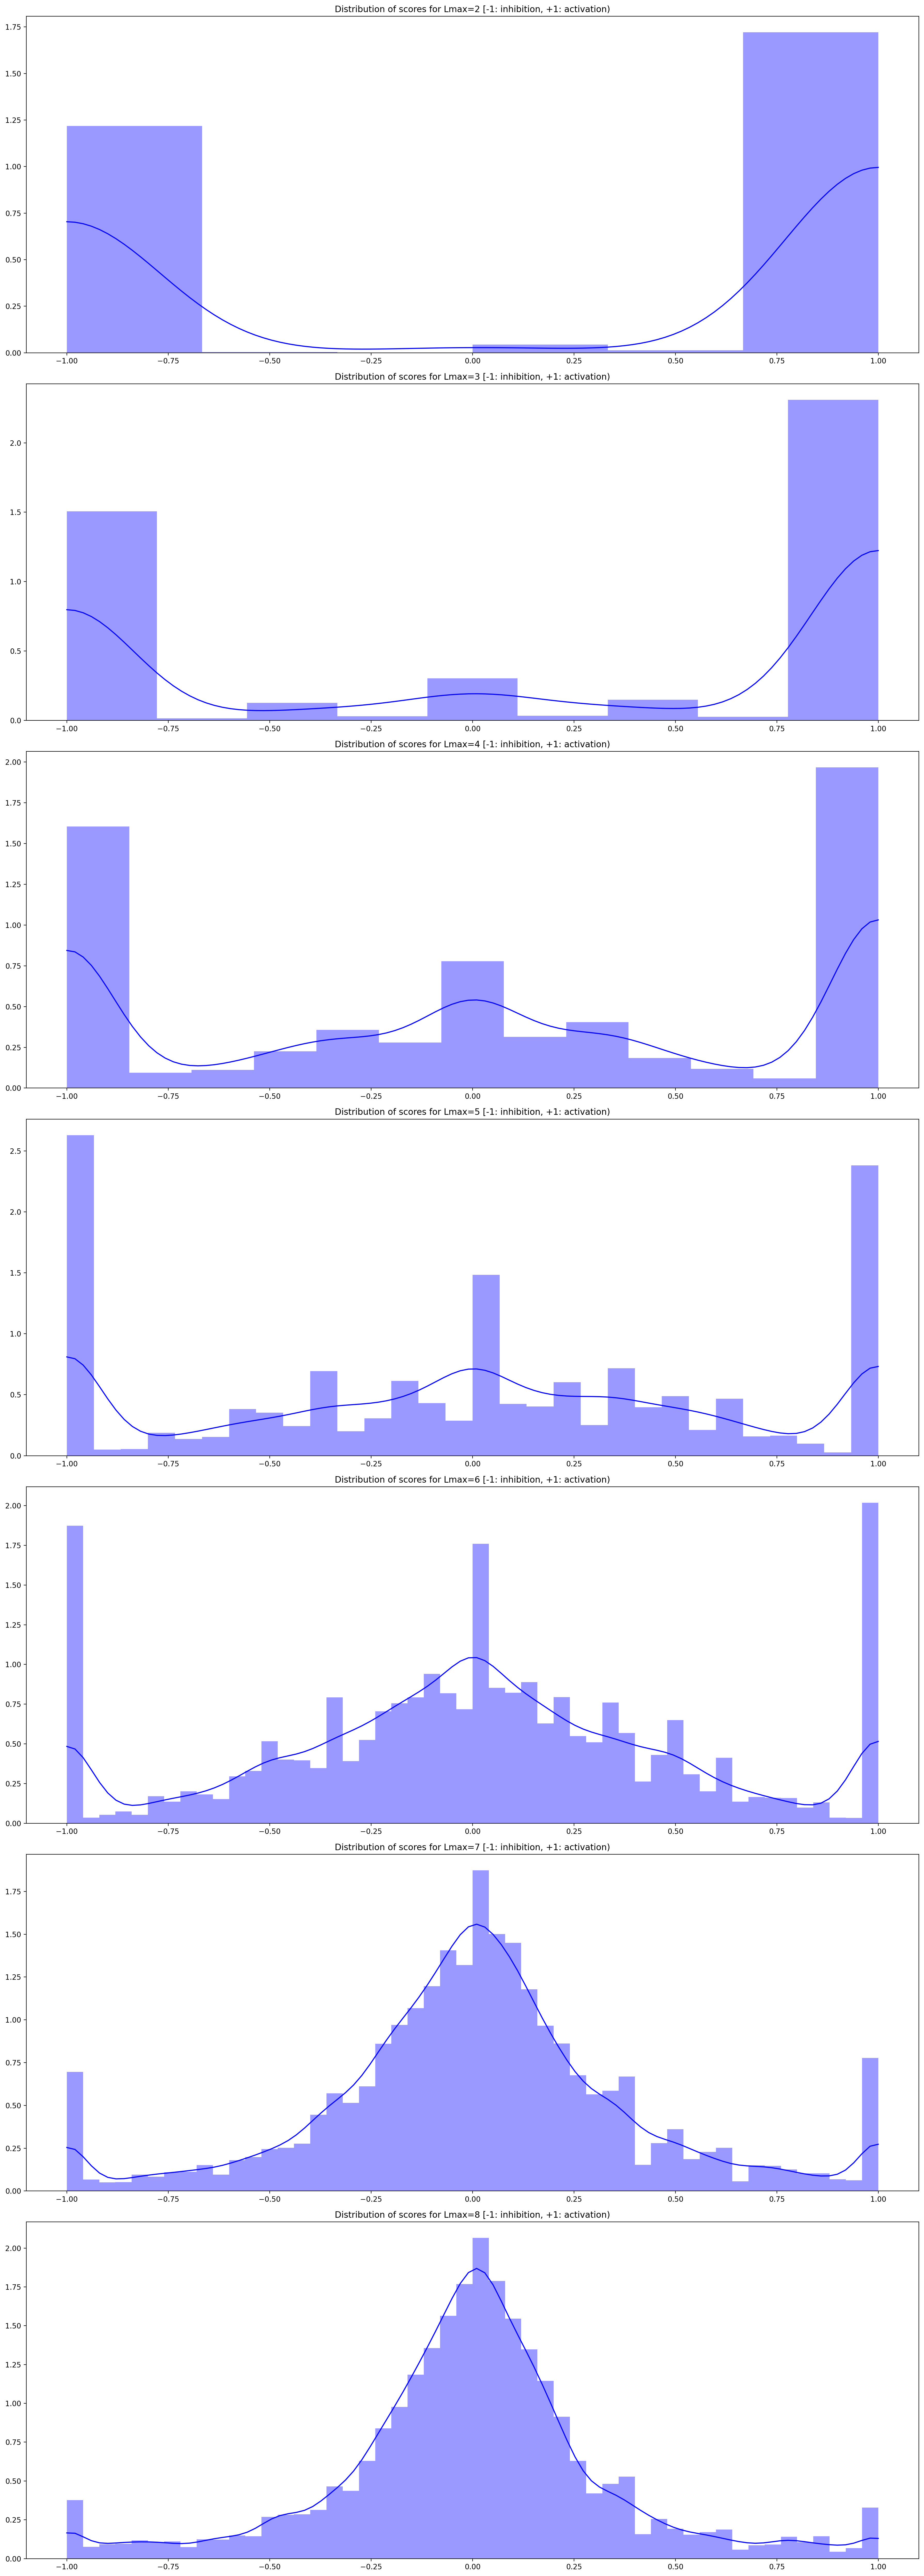

In [11]:
plot_distributions(results_cycles_original_openbiolink)

Plot results for the cycles version of the algorithm on the permuted OpenBioLink

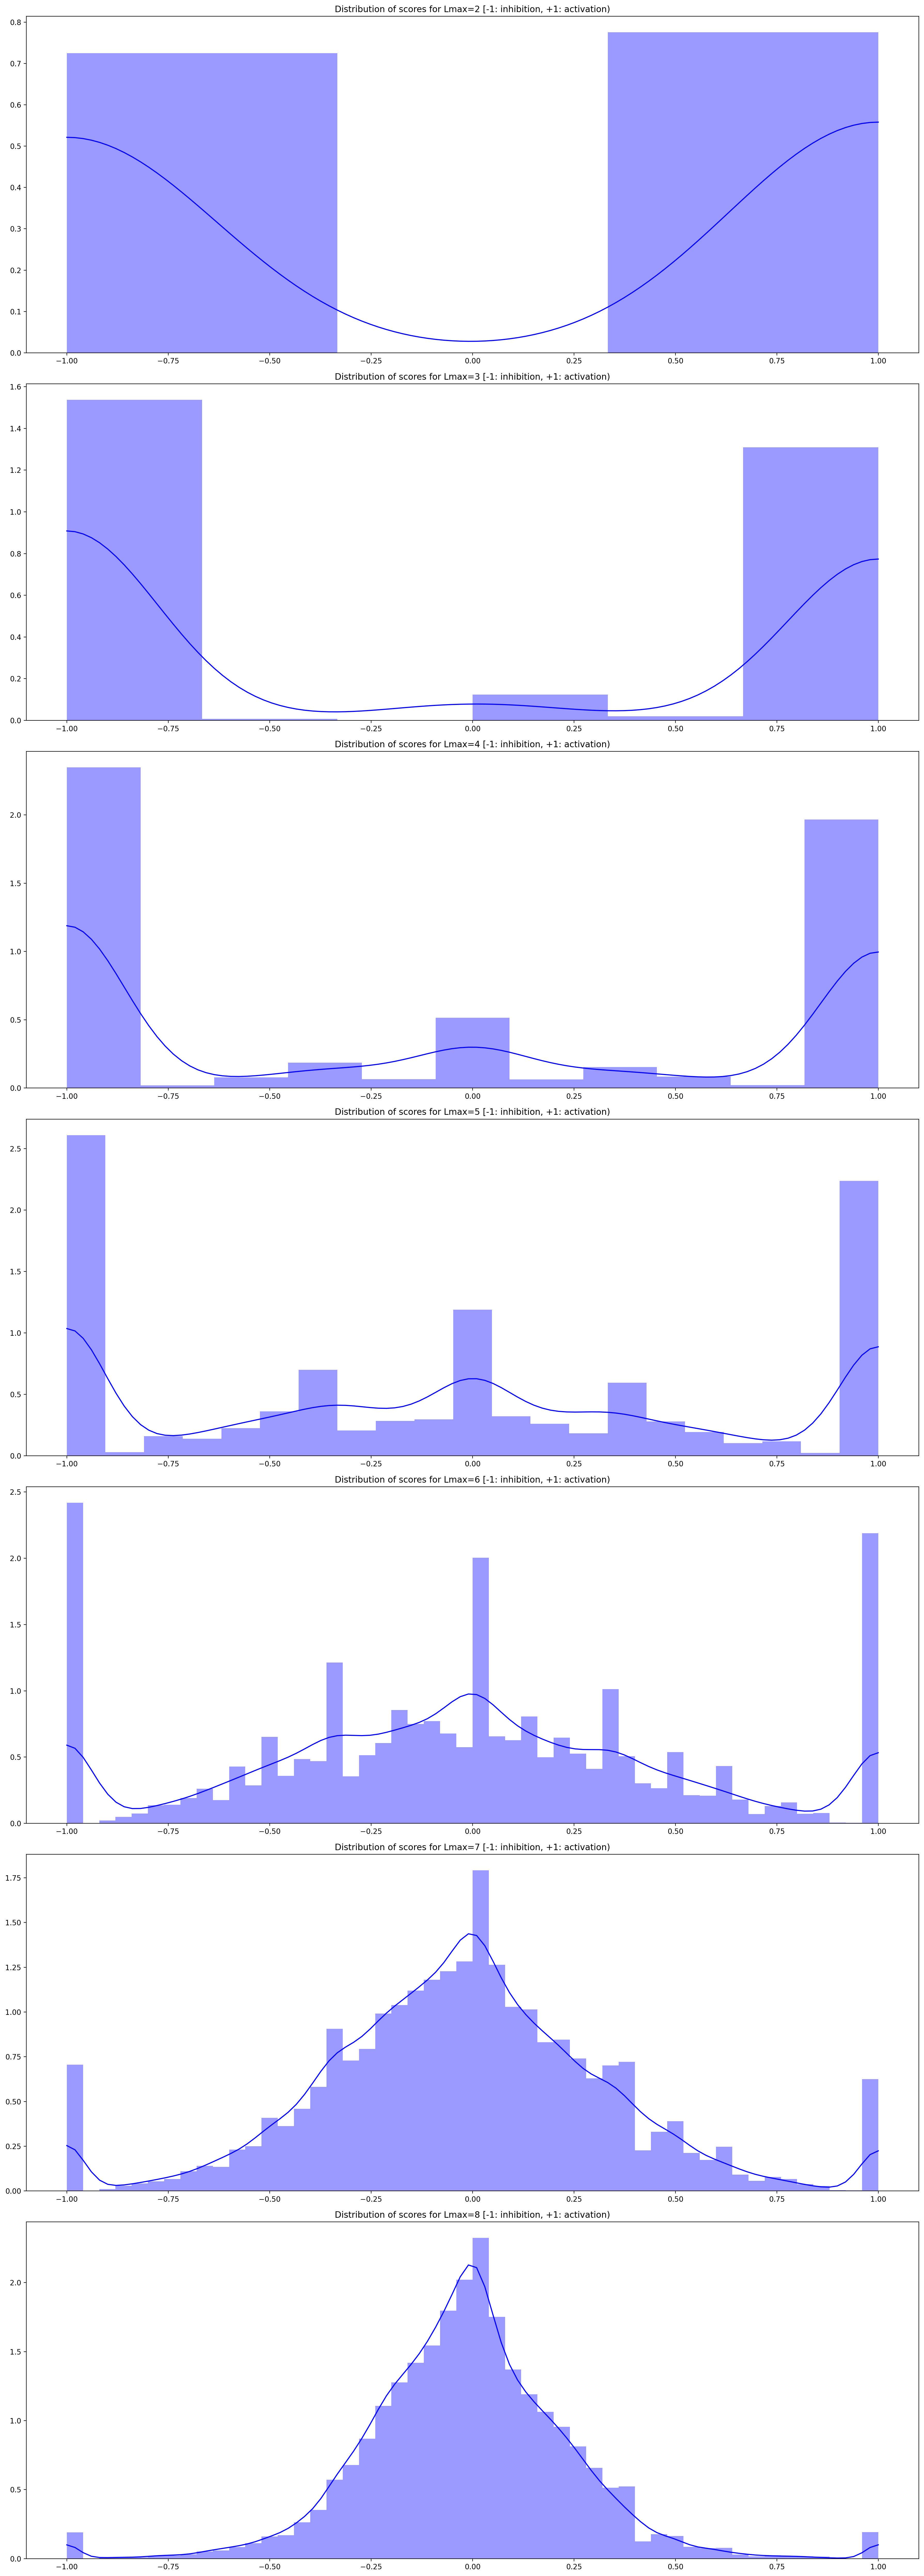

In [12]:
plot_distributions(results_simple_paths_permuted_openbiolink)

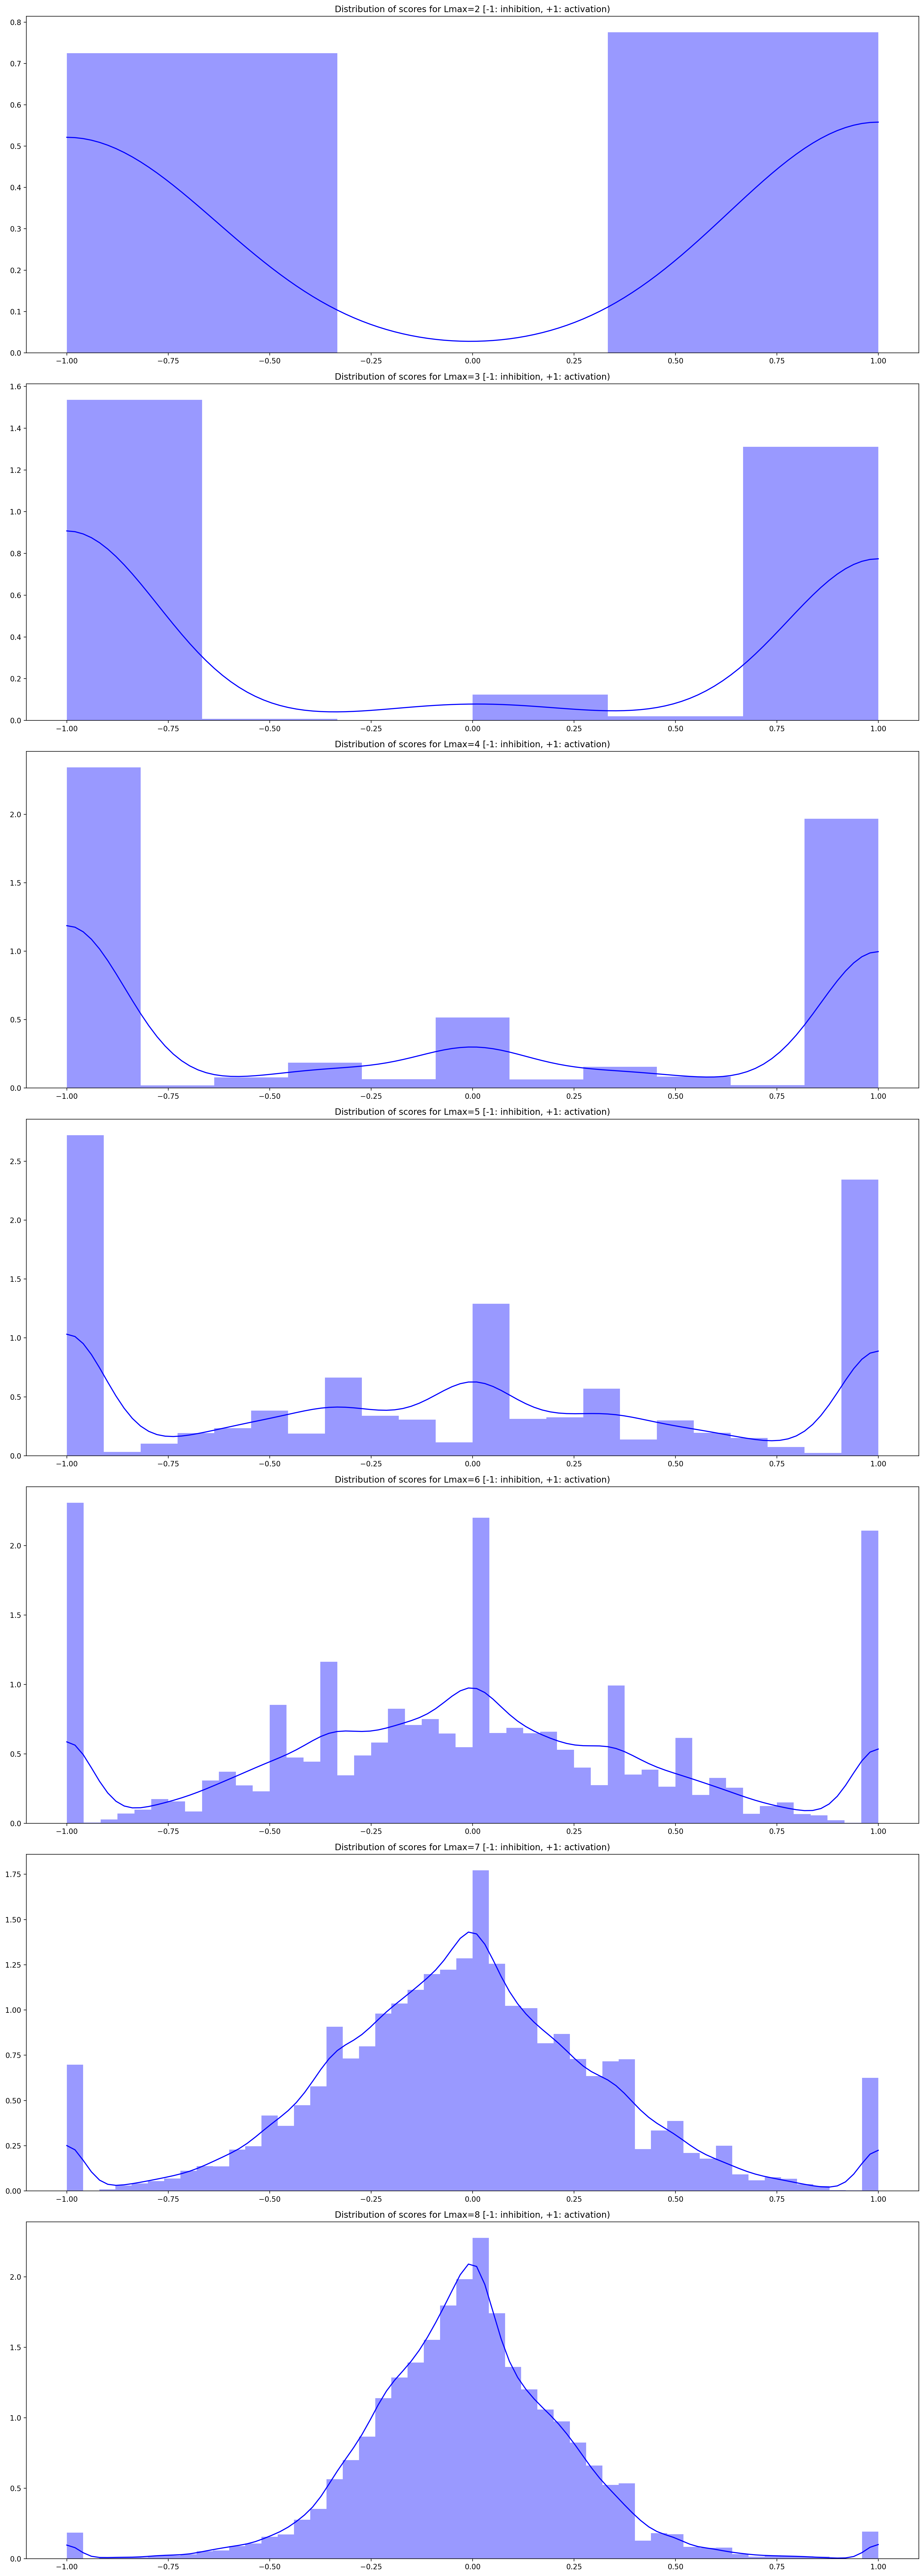

In [13]:
plot_distributions(results_cycles_paths_permuted_openbiolink)